# Preprocessing notebook — Lung Sound Spectral Paper Implementation



<div style="background: linear-gradient(135deg, #ff6a00, #ee0979); 
            padding: 28px; 
            border-radius: 14px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            text-align:center; 
            box-shadow: 2px 2px 14px rgba(0,0,0,0.35);">

  <h1 style="margin:0; font-size:30px;">📝 Notebook 1: Preprocessing</h1>
  <h3 style="margin:10px 0 20px 0; font-weight:normal; font-size:18px;">
    Normalization → Segmentation → Filtration
  </h3>

  <hr style="border: 1px solid rgba(255,255,255,0.4); width:60%; margin:auto;">

  <p style="margin-top:20px; font-size:16px; line-height:1.6;">
    <b>Author:</b> Engr. <span style="color:#FFD700;">Misha Urooj Khan</span><br>
    <b>Date:</b> 21-08-2025
  </p>
</div>


<div style="background: linear-gradient(135deg, #36d1dc, #5b86e5); 
            padding: 20px; 
            border-radius: 14px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 14px rgba(0,0,0,0.3);">

  <h2 style="margin-top:0; text-align:center; font-size:26px;">📖 Research Foundation</h2>

  <p style="font-size:15px; line-height:1.6;">
    This notebook is inspired by the IEEE paper:<br>
    <b style="color:#FFD700;">"Spectral Analysis of Lung Sounds for Classification of Asthma and Pneumonia Wheezing"</b>
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <h3 style="margin-bottom:6px;">🔗 Useful Links</h3>
  <ul style="font-size:14px; line-height:1.7;">
    <li>📘 <b>IEEE Paper:</b> 
      <a href="https://ieeexplore.ieee.org/document/9179417" target="_blank" style="color:#ffdd57; text-decoration:none;">
        https://ieeexplore.ieee.org/document/9179417
      </a>
    </li>
    <li>📖 <b>ResearchGate (Free Download):</b> 
      <a href="https://www.researchgate.net/publication/350452872_Spectral_Analysis_of_Lungs_sounds_for_Classification_of_Asthma_and_Pneumonia_Wheezing" target="_blank" style="color:#ffdd57; text-decoration:none;">
        View on ResearchGate
      </a>
    </li>
    <li>🎥 <b>IEEE Presentation Video:</b> 
      <span style="color:#ccc;">(Link Placeholder — add when available)</span>
    </li>
    <li>🖥️ <b>Code Explanation (YouTube):</b> 
      <span style="color:#ccc;">(Link Placeholder — add when available)</span>
    </li>
    <li>💻 <b>GitHub Repository:</b> 
      <span style="color:#ccc;">(Link Placeholder — add when available)</span>
    </li>
  </ul>

  <p style="font-size:14px; line-height:1.6;">
    ✅ These resources provide the <b>academic background</b> and 
    <b>practical implementation guides</b> for our project.  
    Use them to deepen your understanding beyond this notebook.
  </p>
</div>


<div style="background: linear-gradient(135deg, #1f77b4, #2ca02c); 
            padding: 18px; 
            border-radius: 12px; 
            color: white; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 10px rgba(0,0,0,0.25);">

  <h2 style="margin-top:0; text-align:center; font-size:28px;">🔊 Lung Sound Preprocessing Pipeline</h2>

  <p style="font-size:16px; line-height:1.6;">
    Before we can classify lung sounds into <b style="color:#FFD700;">Normal</b>, 
    <b style="color:#FF6347;">Asthma</b>, and 
    <b style="color:#ADFF2F;">Pneumonia</b>, 
    we must first <b>clean and structure</b> the raw recordings. 
    This ensures our machine learning models focus on the <i>relevant respiratory patterns</i> instead of noise or silence.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.3);">

  <h3 style="margin-bottom:6px;">📌 Steps in Preprocessing</h3>
  <ul style="font-size:15px; line-height:1.6;">
    <li>🎚️ <b>Normalization</b>: Scale signals between <code>0 → 1</code> (Min–Max method).</li>
    <li>✂️ <b>Segmentation</b>: Slice into <b>250 ms frames</b> (with 50% overlap) to focus on breathing cycles.</li>
    <li>🔇 <b>Silence Removal</b>: Drop low-energy frames (below 20th percentile) to ignore pauses & noise.</li>
    <li>🎛️ <b>Filtering</b>: Apply a <b>10th-order Butterworth bandpass</b> 
        (250–2000 Hz) — this keeps frequencies where wheezes and crackles usually lie.</li>
  </ul>

  <hr style="border: 1px solid rgba(255,255,255,0.3);">

  <p style="font-size:15px; line-height:1.6;">
    ✅ By the end of this step, we’ll have <b>clean, normalized, and framed lung sound segments</b> that are 
    ready for <span style="color:#FFD700;">feature extraction</span> and 
    <span style="color:#00CED1;">classification</span>.
  </p>
</div>


<div style="background: linear-gradient(120deg, #6a11cb, #2575fc); 
            padding: 18px; 
            border-radius: 12px; 
            color: white; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 10px rgba(0,0,0,0.25);">

  <h2 style="margin-top:0; text-align:center; font-size:26px;">⚙️ Setup: Libraries & Global Parameters</h2>

  <p style="font-size:15px; line-height:1.6;">
    Before diving into <b style="color:#FFD700;">lung sound preprocessing</b>, we need to 
    <b>import essential Python libraries</b> and 
    <b>define consistent parameters</b> for our experiments. 
    Think of this as <i>building the lab environment</i> before running the actual tests.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.3);">

  <h3 style="margin-bottom:6px;">📚 Libraries</h3>
  <ul style="font-size:14px; line-height:1.6;">
    <li><b>numpy</b> &mdash; fast numerical computations</li>
    <li><b>matplotlib</b> &mdash; professional plotting</li>
    <li><b>scipy</b> &mdash; audio I/O, filtering, Fourier transforms</li>
    <li><b>tqdm</b> &mdash; progress bars for long loops</li>
    <li><b>dataclasses</b> & typing — neat structuring of data & type hints</li>
  </ul>

  <h3 style="margin-bottom:6px;">🗂️ Dataset Path</h3>
  <p style="font-size:14px;">
    <code>/kaggle/input/spectral-paper/Dataset</code> is our dataset root.  
    Inside, we expect three folders: 
    <span style="color:#ADFF2F;"><b>Normal</b></span>, 
    <span style="color:#FF6347;"><b>Asthama</b></span>, 
    <span style="color:#FFD700;"><b>Pneumonia</b></span>.
  </p>

  <h3 style="margin-bottom:6px;">🔧 Preprocessing Parameters</h3>
  <ul style="font-size:14px; line-height:1.6;">
    <li><b>FS_TARGET = 44.1 kHz</b> → standard sample rate</li>
    <li><b>BANDPASS = 250–2000 Hz</b> → region of interest for lung sounds</li>
    <li><b>FILTER_ORDER = 10</b> → sharp Butterworth filter</li>
    <li><b>FRAME_MS = 250 ms</b> → frame size for segmentation</li>
    <li><b>HOP_RATIO = 0.5</b> → 50% overlap between frames</li>
    <li><b>SILENCE_PERCENTILE = 20</b> → discard quietest 20% frames</li>
  </ul>

  <hr style="border: 1px solid rgba(255,255,255,0.3);">

  <p style="font-size:14px; line-height:1.6;">
    ✅ With this environment prepared, every experiment will run on 
    <b>standardized settings</b>, making results reproducible and comparable.
  </p>
</div>


In [14]:

from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, sosfreqz
from scipy.fft import rfft, rfftfreq
from dataclasses import dataclass
from typing import Tuple, List, Dict, Optional
from tqdm import tqdm

# --- paths -------------------------------------------------------------------
DATA_ROOT = Path(r"/kaggle/input/spectral-paper/Dataset")  # <- adjust if needed
CLASS_NAMES = ["Normal", "Asthama", "Pneumonia"] # keep consistent with folders

# --- signal & preprocessing parameters ---------------------------------------
FS_TARGET = 44100                    # Hz (paper uses 44.1 kHz)
BANDPASS = (250, 2000)               # Hz (ROI stated in paper)
FILTER_ORDER = 10                    # 10th-order Butterworth
FRAME_MS = 250                       # segmentation frame length
HOP_RATIO = 0.50                     # 50% overlap is a good compromise
SILENCE_METHOD = "energy_percentile" # simple, robust VAD
SILENCE_PERCENTILE = 20              # drop frames with energy below this pctl

# --- quality-of-life ---------------------------------------------------------
np.set_printoptions(suppress=True)
plt.rcParams["figure.dpi"] = 110
plt.rcParams["axes.grid"] = True


<div style="background: linear-gradient(120deg, #ff7e5f, #feb47b); 
            padding: 18px; 
            border-radius: 12px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 12px rgba(0,0,0,0.25);">

  <h2 style="margin-top:0; text-align:center; font-size:24px;">🛠️ Preprocessing Helper Functions</h2>

  <p style="font-size:15px; line-height:1.6;">
    This block defines <b>modular helper functions</b> that will be reused throughout our project.  
    They ensure our pipeline is <b>clean, consistent, and reproducible</b>.  
    Think of them as the <i>“toolbox”</i> for lung sound analysis.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <ul style="font-size:14px; line-height:1.6;">
    <li>📂 <b>read_wav</b>: loads audio, converts to float, folds stereo → mono</li>
    <li>🎚️ <b>minmax_normalize</b>: rescales signal into <code>[0,1]</code></li>
    <li>✂️ <b>frame_signal</b>: slices audio into overlapping frames</li>
    <li>🔇 <b>drop_silent_frames</b>: removes low-energy (silent) frames</li>
    <li>📈 <b>short_time_energy</b>: measures energy per frame</li>
    <li>🎛️ <b>design_bandpass</b> & <b>apply_zero_phase</b>: 
        build & apply a <b>Butterworth bandpass filter</b> (zero-phase for no distortion)</li>
  </ul>

  <p style="font-size:14px; line-height:1.6;">
    ✅ With these utilities ready, we can <b>normalize, segment, denoise, and filter</b> any lung sound recording 
    in just a few lines of code.
  </p>
</div>


In [15]:
from pathlib import Path
from typing import Tuple
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, sosfiltfilt

# --- constants
FS_TARGET = 44100  # expected sample rate

# --- I/O + preprocessing helpers
def read_wav(path: Path) -> Tuple[int, np.ndarray]:
    """Load a WAV file. Returns (fs, mono_float32)."""
    fs, sig = wavfile.read(str(path))
    # to float32
    if np.issubdtype(sig.dtype, np.integer):
        sig = sig.astype(np.float32) / np.iinfo(sig.dtype).max
    else:
        sig = sig.astype(np.float32)
    # stereo -> mono
    if sig.ndim == 2:
        sig = sig.mean(axis=1)
    return fs, sig

def resample_if_needed(fs: int, x: np.ndarray) -> Tuple[int, np.ndarray]:
    if fs != FS_TARGET:
        raise ValueError(f"Found fs={fs} but expected {FS_TARGET}. "
                         "If your data truly differs, use resample_poly here.")
    return fs, x

def minmax_normalize(x: np.ndarray, eps: float = 1e-12) -> np.ndarray:
    x_min = np.min(x)
    x_max = np.max(x)
    denom = max(x_max - x_min, eps)
    return (x - x_min) / denom

def frame_signal(x: np.ndarray, fs: int, frame_ms: int, hop_ratio: float = 0.5) -> np.ndarray:
    frame_len = int(round(frame_ms * 1e-3 * fs))
    hop = max(1, int(round(frame_len * hop_ratio)))
    if frame_len <= 1:
        raise ValueError("Frame length too small — check frame_ms.")
    n_frames = 1 + (len(x) - frame_len) // hop
    if n_frames <= 0:
        return np.empty((0, frame_len), dtype=x.dtype)
    frames = np.lib.stride_tricks.as_strided(
        x, shape=(n_frames, frame_len),
        strides=(x.strides[0] * hop, x.strides[0]),
        writeable=False
    )
    return frames.copy()

def short_time_energy(frames: np.ndarray) -> np.ndarray:
    return (frames ** 2).mean(axis=1)

def drop_silent_frames(frames: np.ndarray,
                       method: str = "energy_percentile",
                       percentile: int = 20) -> np.ndarray:
    if len(frames) == 0:
        return frames
    energy = short_time_energy(frames)
    if method == "energy_percentile":
        thr = np.percentile(energy, percentile)
        keep = energy > thr
        return frames[keep]
    else:
        raise NotImplementedError(f"Unknown silence removal method: {method}")

# --- filtering
def design_bandpass(fs: int, f_lo: float, f_hi: float, order: int = 10):
    """Return second-order sections for a Butterworth bandpass."""
    return butter(order, [f_lo, f_hi], btype="bandpass", fs=fs, output="sos")

def apply_zero_phase(sos, x, axis=-1):
    """Zero-phase filtering on SOS (sosfiltfilt)."""
    x = np.asarray(x, dtype=float)
    return sosfiltfilt(sos, x, axis=axis)




<div style="background: linear-gradient(135deg, #00c6ff, #0072ff); 
            padding: 18px; 
            border-radius: 12px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 12px rgba(0,0,0,0.25);">

  <h2 style="margin-top:0; text-align:center; font-size:24px;">🎛️ Visualizing the Band-Pass Filter</h2>

  <p style="font-size:15px; line-height:1.6;">
    In this step we <b>design and inspect</b> our 
    <b>10th-order Butterworth band-pass filter</b>.  
    This filter is crucial because it allows only the 
    <span style="color:#FFD700;"><b>250–2000 Hz</b></span> range of frequencies to pass through —
    the region where lung sounds like <i>wheezes</i> and <i>crackles</i> usually occur.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <ul style="font-size:14px; line-height:1.6;">
    <li>⚡ <b>X-axis:</b> Frequency (Hz, logarithmic scale)</li>
    <li>📉 <b>Y-axis:</b> Magnitude response in decibels (dB)</li>
    <li>🔵 <b>Blue curve:</b> shows how strongly each frequency is kept or suppressed</li>
    <li>⚙️ <b>Dashed lines:</b> cutoff points at 250 Hz and 2000 Hz</li>
  </ul>

  <p style="font-size:14px; line-height:1.6;">
    ✅ By plotting the filter response, we confirm that only the 
    <b>desired breathing frequency band</b> is preserved, while all 
    unwanted low-frequency noise (like microphone rumble) and 
    high-frequency artifacts are attenuated.
  </p>
</div>


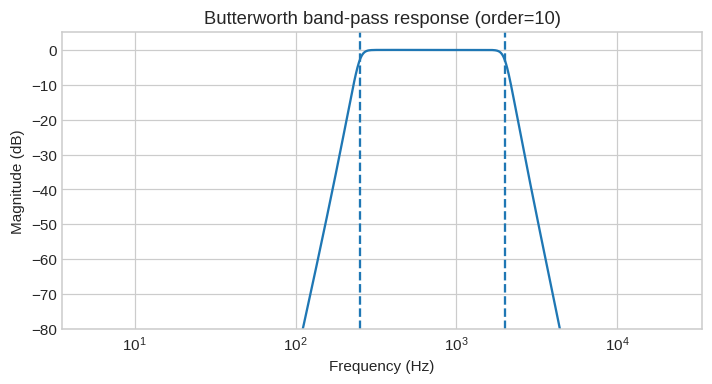

In [16]:
sos = design_bandpass(FS_TARGET, *BANDPASS, FILTER_ORDER)
w, h = sosfreqz(sos, worN=4096, fs=FS_TARGET)

plt.figure(figsize=(7.5, 3.5))
plt.semilogx(w, 20*np.log10(np.maximum(np.abs(h), 1e-12)))
plt.title(f"Butterworth band-pass response (order={FILTER_ORDER})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.axvline(BANDPASS[0], linestyle="--")
plt.axvline(BANDPASS[1], linestyle="--")
plt.ylim([-80, 5])
plt.show()


<div style="background: linear-gradient(135deg, #ff9966, #ff5e62); 
            padding: 18px; 
            border-radius: 12px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 12px rgba(0,0,0,0.25);">

  <h2 style="margin-top:0; text-align:center; font-size:24px;">🚀 Usage Example & Sanity Report</h2>

  <p style="font-size:15px; line-height:1.6;">
    This block shows a <b>full preprocessing pipeline in action</b> on a single lung sound file.  
    We process one recording step by step and then print a <i>dimension report</i> to check that everything is working as expected.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <h3 style="margin-bottom:6px;">📌 Steps Performed</h3>
  <ul style="font-size:14px; line-height:1.6;">
    <li>📂 <b>Read</b>: load a .wav recording from the dataset</li>
    <li>🎼 <b>Check sample rate</b>: confirm 44.1 kHz (resample if needed)</li>
    <li>➖ <b>Center</b>: remove DC offset before filtering</li>
    <li>🎚️ <b>Band-pass filter</b>: keep only 250–2000 Hz frequencies</li>
    <li>✨ <b>Normalize</b>: rescale amplitudes to [0,1]</li>
    <li>✂️ <b>Frame the signal</b>: slice into 250 ms chunks with 50% overlap</li>
    <li>🔇 <b>Silence removal</b>: drop quietest 20% frames</li>
    <li>📊 <b>Sanity report</b>: print dimensions, duration, and frame retention stats</li>
  </ul>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <p style="font-size:14px; line-height:1.6;">
    ✅ This gives us a <b>clear diagnostic view</b>:  
    we can see how many frames were created, how many survived silence removal, 
    and confirm that preprocessing behaves consistently before moving on to batch processing.
  </p>
</div>


In [17]:
# ---------- usage example ----------
# 1) read
path = Path("/kaggle/input/spectral-paper/Dataset/Asthama/Asthama1_(1).wav")
fs, x = read_wav(path)

# 2) check sample rate
fs, x = resample_if_needed(fs, x)

# 3) center (avoids DC bias before bandpass)
x_centered = x - x.mean()

# 4) bandpass 250–2000 Hz, order 10
sos = design_bandpass(fs, 250.0, 2000.0, order=10)

# 5) zero-phase filtering
x_bp = apply_zero_phase(sos, x_centered)

# 6) (optional) normalize AFTER filtering for later feature extraction
x_norm = minmax_normalize(x_bp)

# 7) framing and silence removal
frames = frame_signal(x_norm, fs, frame_ms=250, hop_ratio=0.5)
frames_kept = drop_silent_frames(frames, percentile=20)

# --- quick dimension / sanity report -----------------------------------------
def _desc(name, arr, fs=None):
    if isinstance(arr, np.ndarray):
        shape = arr.shape
        dtype = arr.dtype
        msg = f"{name:>14}: shape={shape}, dtype={dtype}"
        if fs is not None and arr.ndim == 1:
            msg += f", duration={len(arr)/fs:.3f}s"
        print(msg)
    else:
        print(f"{name:>14}: {arr} ({type(arr).__name__})")

print("=== Dimension report ===")
_desc("path", path)
_desc("fs", fs)
_desc("x (raw)", x, fs=fs)
_desc("x_centered", x_centered, fs=fs)
_desc("sos (filter)", sos)
_desc("x_bp", x_bp, fs=fs)
_desc("x_norm", x_norm, fs=fs)
_desc("frames", frames)
_desc("frames_kept", frames_kept)

# extra: frame geometry + retention
frame_len = frames.shape[1] if frames.size else int(round(0.250 * fs))
hop = int(round(frame_len * 0.5))
n_before = frames.shape[0]
n_after  = frames_kept.shape[0]
print("\n--- framing details ---")
print(f"frame_len = {frame_len} samples ({frame_len/fs:.3f}s)")
print(f"hop       = {hop} samples ({hop/fs:.3f}s)  (50% overlap)")
print(f"frames before silence removal: {n_before}")
print(f"frames kept   after  removal: {n_after}  ({(100*n_after/max(1,n_before)):.1f}%)")


=== Dimension report ===
          path: /kaggle/input/spectral-paper/Dataset/Asthama/Asthama1_(1).wav (PosixPath)
            fs: 44100 (int)
       x (raw): shape=(1323000,), dtype=float32, duration=30.000s
    x_centered: shape=(1323000,), dtype=float32, duration=30.000s
  sos (filter): shape=(10, 6), dtype=float64
          x_bp: shape=(1323000,), dtype=float64, duration=30.000s
        x_norm: shape=(1323000,), dtype=float64, duration=30.000s
        frames: shape=(239, 11025), dtype=float64
   frames_kept: shape=(191, 11025), dtype=float64

--- framing details ---
frame_len = 11025 samples (0.250s)
hop       = 5512 samples (0.125s)  (50% overlap)
frames before silence removal: 239
frames kept   after  removal: 191  (79.9%)


<div style="background: linear-gradient(135deg, #43cea2, #185a9d); 
            padding: 18px; 
            border-radius: 12px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 12px rgba(0,0,0,0.25);">

  <h2 style="margin-top:0; text-align:center; font-size:24px;">📊 Visualizing Lung Sound Classes</h2>

  <p style="font-size:15px; line-height:1.6;">
    After preprocessing, it’s time to <b>see how the signals look</b> in both the 
    <b>time domain</b> and the <b>frequency domain</b>.  
    Visualization helps us compare patterns across the three classes:
    <span style="color:#1f77b4;"><b>Normal</b></span>, 
    <span style="color:#d62728;"><b>Asthama</b></span>, 
    and <span style="color:#2ca02c;"><b>Pneumonia</b></span>.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <h3 style="margin-bottom:6px;">📌 What this function does</h3>
  <ul style="font-size:14px; line-height:1.6;">
    <li>🖼️ <b>Overlay plots</b>: Show all classes on the same axes for direct comparison</li>
    <li>⏱️ <b>Time domain</b>: Amplitude vs. Time (reveals breathing cycles & patterns)</li>
    <li>🎶 <b>Frequency domain</b>: Magnitude vs. Frequency (shows spectral energy distribution)</li>
    <li>📑 <b>Subplots per class</b>: Side-by-side panels with the same scale, making differences easy to spot</li>
    <li>🎨 <b>Colors</b>: Each class has a consistent color — 
        blue = Normal, red = Asthama, green = Pneumonia</li>
  </ul>

  <p style="font-size:14px; line-height:1.6;">
    ✅ These plots help us visually verify that <b>filtering and normalization worked correctly</b>, 
    and they give an intuitive sense of how <b>respiratory conditions differ acoustically</b>.
  </p>
</div>


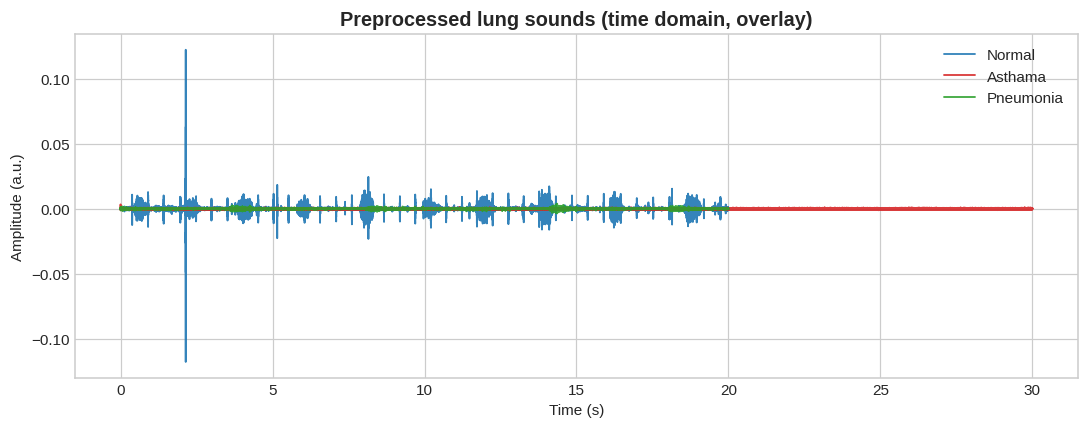

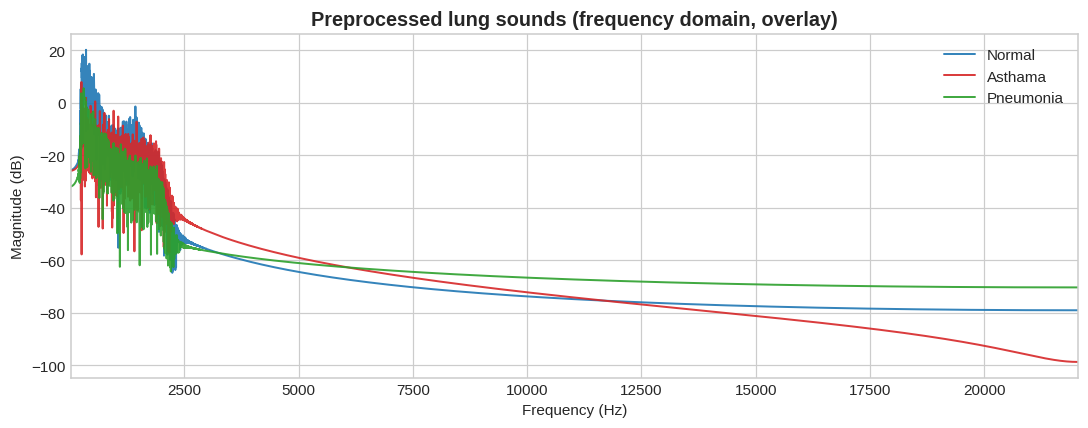

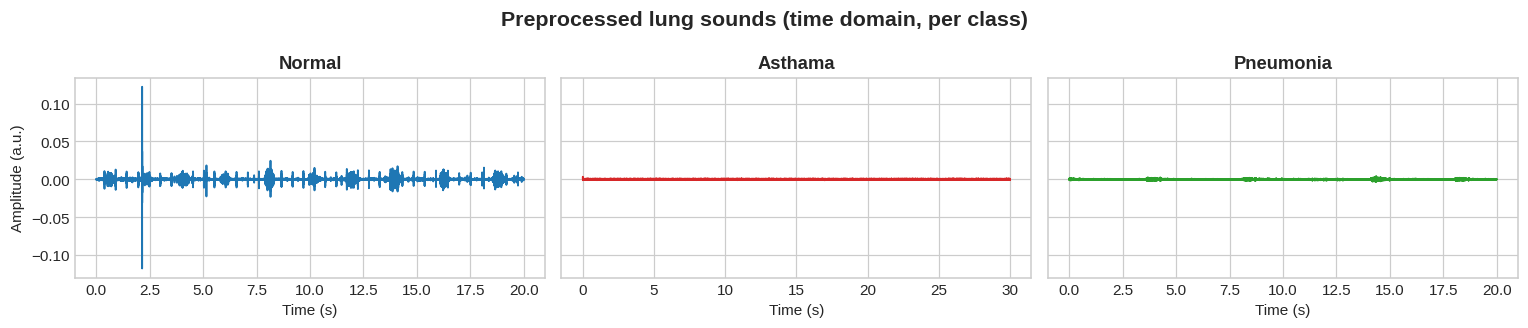

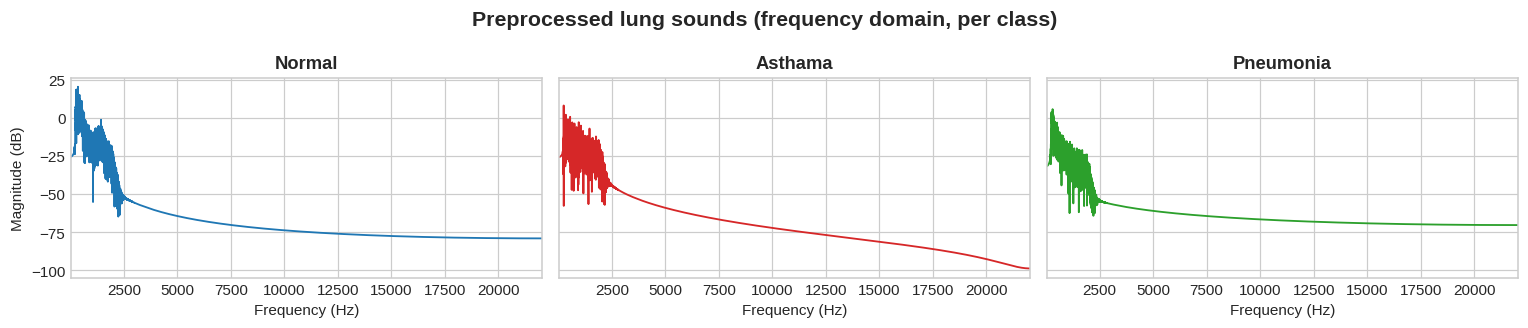

In [19]:
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

COLORS = {
    "Normal":    "#1f77b4",  # blue
    "Asthama":    "#d62728",  # red
    "Pneumonia": "#2ca02c",  # green
}

def plot_class_examples(data_root, class_names=CLASS_NAMES, nfft=1<<15):
    plt.style.use("seaborn-v0_8-whitegrid")

    # pick one file per class
    example_files = {}
    for cname in class_names:
        wavs = list((data_root / cname).glob("*.wav"))
        if wavs:
            example_files[cname] = wavs[0]
        else:
            print(f"[WARN] no wav files for class {cname}")

    # === OVERLAY VIEW (all classes on same plot) =============================
    # Time domain
    fig, ax = plt.subplots(figsize=(10, 4))
    for cname, path in example_files.items():
        fs, x = read_wav(path)
        fs, x = resample_if_needed(fs, x)
        t = np.arange(len(x)) / fs
        sos = design_bandpass(fs, 250, 2000, order=10)
        x_filt = apply_zero_phase(sos, x - x.mean())
        ax.plot(t, x_filt, color=COLORS[cname], lw=1.2, alpha=0.9, label=cname)
    ax.set_title("Preprocessed lung sounds (time domain, overlay)", fontsize=13, weight="bold")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (a.u.)")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Frequency domain
    fig, ax = plt.subplots(figsize=(10, 4))
    for cname, path in example_files.items():
        fs, x = read_wav(path)
        fs, x = resample_if_needed(fs, x)
        sos = design_bandpass(fs, 250, 2000, order=10)
        x_filt = apply_zero_phase(sos, x - x.mean())
        Xf = np.abs(rfft(x_filt, n=nfft))
        F = rfftfreq(nfft, 1/fs)
        ax.plot(F, 20*np.log10(np.maximum(Xf, 1e-12)),
                color=COLORS[cname], lw=1.3, alpha=0.9, label=cname)
    ax.set_xlim(20, fs/2)
    ax.set_title("Preprocessed lung sounds (frequency domain, overlay)", fontsize=13, weight="bold")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude (dB)")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # === SUBPLOTS PER CLASS ==================================================
    # Time domain panels
    fig, axes = plt.subplots(1, len(example_files), figsize=(14, 3), sharey=True)
    for ax, (cname, path) in zip(axes, example_files.items()):
        fs, x = read_wav(path)
        fs, x = resample_if_needed(fs, x)
        t = np.arange(len(x)) / fs
        sos = design_bandpass(fs, 250, 2000, order=10)
        x_filt = apply_zero_phase(sos, x - x.mean())
        ax.plot(t, x_filt, color=COLORS[cname], lw=1.2)
        ax.set_title(cname, fontsize=12, weight="bold")
        ax.set_xlabel("Time (s)")
    axes[0].set_ylabel("Amplitude (a.u.)")
    fig.suptitle("Preprocessed lung sounds (time domain, per class)", fontsize=14, weight="bold")
    plt.tight_layout()
    plt.show()

    # Frequency domain panels
    fig, axes = plt.subplots(1, len(example_files), figsize=(14, 3), sharey=True)
    for ax, (cname, path) in zip(axes, example_files.items()):
        fs, x = read_wav(path)
        fs, x = resample_if_needed(fs, x)
        sos = design_bandpass(fs, 250, 2000, order=10)
        x_filt = apply_zero_phase(sos, x - x.mean())
        Xf = np.abs(rfft(x_filt, n=nfft))
        F = rfftfreq(nfft, 1/fs)
        ax.plot(F, 20*np.log10(np.maximum(Xf, 1e-12)),
                color=COLORS[cname], lw=1.2)
        ax.set_xlim(20, fs/2)
        ax.set_title(cname, fontsize=12, weight="bold")
        ax.set_xlabel("Frequency (Hz)")
    axes[0].set_ylabel("Magnitude (dB)")
    fig.suptitle("Preprocessed lung sounds (frequency domain, per class)", fontsize=14, weight="bold")
    plt.tight_layout()
    plt.show()

# call it
plot_class_examples(DATA_ROOT)


<div style="background: linear-gradient(135deg, #ff512f, #dd2476); 
            padding: 20px; 
            border-radius: 14px; 
            color: #fff; 
            font-family: 'Segoe UI', sans-serif; 
            box-shadow: 2px 2px 14px rgba(0,0,0,0.3);">

  <h2 style="margin-top:0; text-align:center; font-size:26px;">🎯 Preprocessing & Visualization Pipeline — Summary</h2>

  <p style="font-size:15px; line-height:1.6;">
    We started with <b>raw lung sound recordings</b> and transformed them into 
    <b>clean, structured, and comparable signals</b> ready for machine learning.  
    Along the way, we not only processed the signals but also <b>visualized</b> them 
    to understand their unique characteristics.
  </p>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <h3 style="margin-bottom:6px;">🔄 Pipeline Recap</h3>
  <ol style="font-size:14px; line-height:1.6;">
    <li>📂 <b>Read & Normalize</b> → convert to mono, scale values to [0,1]</li>
    <li>✂️ <b>Segmentation</b> → cut into 250 ms frames with 50% overlap</li>
    <li>🔇 <b>Silence Removal</b> → drop quiet frames (energy < 20th percentile)</li>
    <li>🎛️ <b>Band-Pass Filtering</b> → keep 250–2000 Hz (respiratory range)</li>
    <li>📊 <b>Visualization</b> → 
        - Time domain plots (breathing cycles)<br>
        - Frequency spectra (energy distribution)<br>
        - Overlay & per-class comparisons</li>
  </ol>

  <hr style="border: 1px solid rgba(255,255,255,0.4);">

  <p style="font-size:15px; line-height:1.6;">
    ✅ Now we have a clear understanding of how <span style="color:#FFD700;"><b>Normal</b></span>, 
    <span style="color:#FF6347;"><b>Asthama</b></span>, and 
    <span style="color:#ADFF2F;"><b>Pneumonia</b></span> sounds differ.  
    These preprocessed frames are the perfect input for the next stage: 
    <b style="color:#00e6e6;">feature extraction and classification</b>.
  </p>
</div>
